# Akantu Tutorial: Compute stress intensity factor
	
The main goal of this tutorial is to compute the stress intensity factor in a mode-I configuration

![](schematic.svg)

# Import the necessary modules

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import tuto
import numpy as np
import akantu as aka
from tqdm.notebook import tqdm

In [2]:
params = {
'L': 10,
'crack_length': 10,
'h1': .0005,
'h2': .2,
'U': .1,
}

In [3]:
model, mesh = tuto.createModel(**params)

Mesh generated


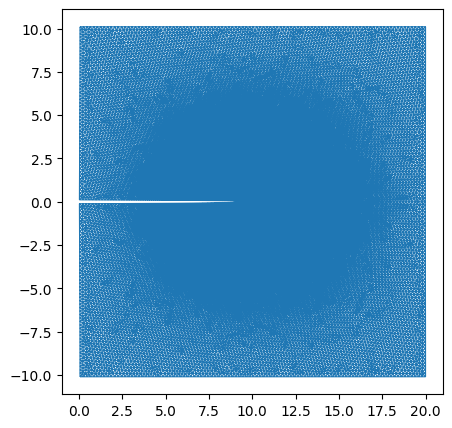

In [4]:
tuto.plotMesh(mesh, displacement=model.getDisplacement())

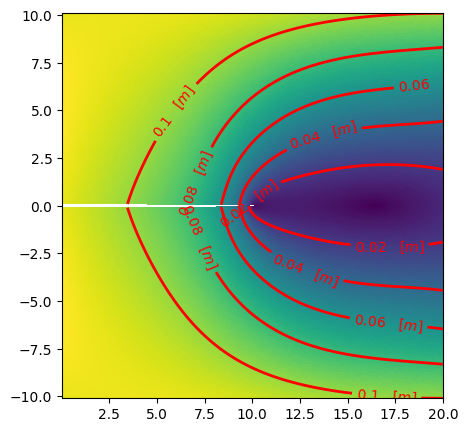

In [5]:
tuto.plotResult(model, displacement=model.getDisplacement(), field='displacement', contour=5)

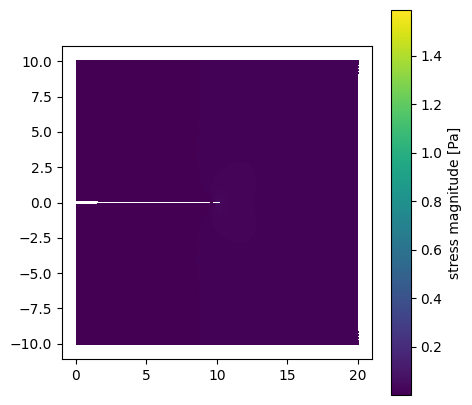

In [6]:
tuto.plotResult(model, displacement=model.getDisplacement(), field='stress')

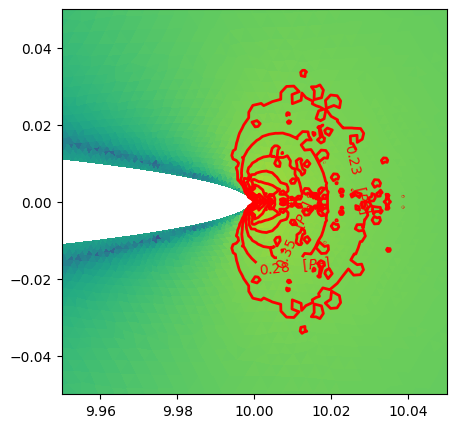

In [7]:
stress = model.getMaterial(0).getStress(aka._triangle_3)
stress_norm = np.linalg.norm(stress, axis=1)
stress_max = stress_norm.max()
c = np.logspace(np.log10(stress_max/7), np.log10(stress_max), 10)
crack_length = params['crack_length']
zoom_range = .05
tuto.plotResult(model, displacement=model.getDisplacement(), field='stress', contour=c, log_color=True,
               xrange=[-zoom_range+crack_length, zoom_range+crack_length], yrange=[-zoom_range, zoom_range])

In [8]:
curve, K = tuto.extract_stress(model, theta=0, r_fit=.2, **params)
r = curve[:, 0]
sigma = curve[:, 1]
print(K)

0.031791552549902215


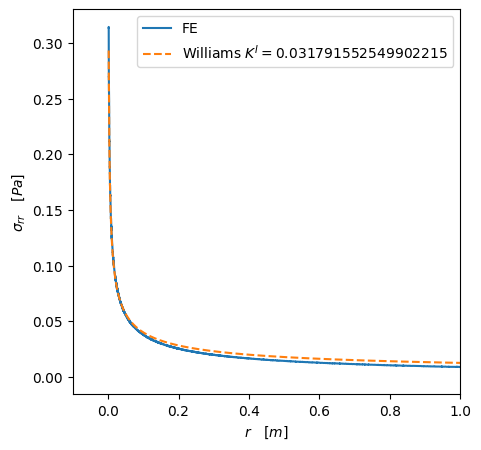

In [9]:
plt.plot(r, sigma, '-', label='FE')
plt.plot(r, K/np.sqrt(r*2*np.pi), '--', label=f'Williams $K^I = {K}$')
plt.xlabel('$r\quad[m]$')
plt.ylabel('$\sigma_{rr}\quad[Pa]$')
plt.legend(loc='best')
_ = plt.xlim([-.1, 1])

In [10]:
curve, K = tuto.extract_stress(model, theta=0, r_fit=.2, shear=True, **params)
r = curve[:, 0]
sigma = curve[:, 1]

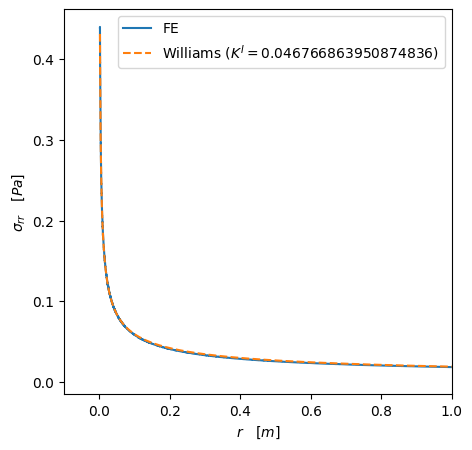

In [11]:
plt.plot(r, sigma, '-', label='FE')
plt.plot(r, K/np.sqrt(r*2*np.pi), '--', label=f'Williams ($K^I = {K}$)')
plt.xlabel('$r\quad[m]$')
plt.ylabel('$\sigma_{rr}\quad[Pa]$')
plt.legend(loc='best')
_ = plt.xlim([-.1, 1])

# Study the variation of $K^I$

  0%|          | 0/9 [00:00<?, ?it/s]

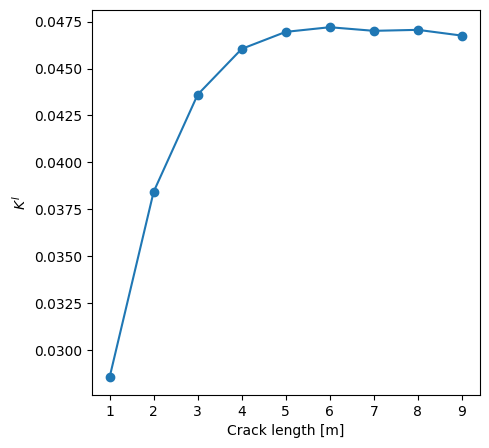

In [12]:
res = []

for l in tqdm(np.arange(1, 10)):
    params = {
    'L': 10,
    'crack_length': l,
    'h1': .0005,
    'h2': .2,
    'U': .1,
    }
    K = tuto.full_study_extract_K(quiet=True, **params)
    res.append((l, K))

res = np.array(res)
plt.plot(res[:, 0], res[:, 1], 'o-')
plt.xlabel('Crack length [m]')
_ = plt.ylabel('$K^I$')

  0%|          | 0/5 [00:00<?, ?it/s]

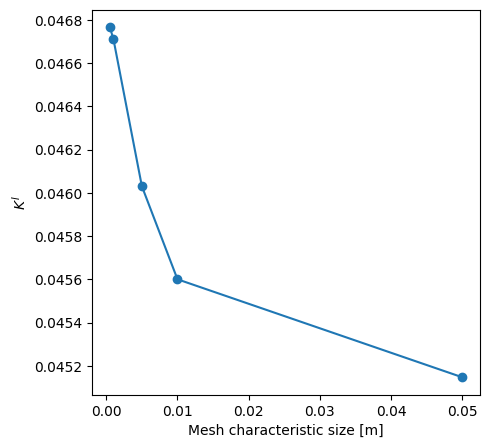

In [13]:
res = []

for h1 in tqdm([.05, .01, .005, .001, .0005]):
    params = {
    'L': 10,
    'crack_length': 10,
    'h1': h1,
    'h2': .2,
    'U': .1,
    }
    K = tuto.full_study_extract_K(quiet=True, **params)
    res.append((h1, K))

res = np.array(res)
plt.plot(res[:, 0], res[:, 1], 'o-')
plt.xlabel('Mesh characteristic size [m]')
_ = plt.ylabel('$K^I$')